In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ecommerce_returns_synthetic_data.csv")  # file ka naam replace karna
df.head()    # first 5 rows

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,Clothing,411.59,3,Changed mind,Returned,387.0,58,Male,City54,Debit Card,Next-Day,45.27
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Books,288.88,3,Wrong item,Returned,31.0,68,Female,City85,Credit Card,Express,47.79
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaN,Toys,390.03,5,NaN,Not Returned,NaN,22,Female,City30,Debit Card,Next-Day,26.64
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaN,Toys,401.09,3,NaN,Not Returned,NaN,40,Male,City95,PayPal,Next-Day,15.37
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaN,Books,110.09,4,NaN,Not Returned,NaN,34,Female,City80,Gift Card,Standard,16.37


In [2]:
print(df.info())      # column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          10000 non-null  object 
 1   Product_ID        10000 non-null  object 
 2   User_ID           10000 non-null  object 
 3   Order_Date        10000 non-null  object 
 4   Return_Date       5052 non-null   object 
 5   Product_Category  10000 non-null  object 
 6   Product_Price     10000 non-null  float64
 7   Order_Quantity    10000 non-null  int64  
 8   Return_Reason     5052 non-null   object 
 9   Return_Status     10000 non-null  object 
 10  Days_to_Return    5052 non-null   float64
 11  User_Age          10000 non-null  int64  
 12  User_Gender       10000 non-null  object 
 13  User_Location     10000 non-null  object 
 14  Payment_Method    10000 non-null  object 
 15  Shipping_Method   10000 non-null  object 
 16  Discount_Applied  10000 non-null  float64

In [3]:
print(df.isnull().sum())  # missing values

Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         4948
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       4948
Return_Status          0
Days_to_Return      4948
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
dtype: int64


In [4]:
df = df.drop_duplicates()

In [5]:
print(df.dtypes)

Order_ID             object
Product_ID           object
User_ID              object
Order_Date           object
Return_Date          object
Product_Category     object
Product_Price       float64
Order_Quantity        int64
Return_Reason        object
Return_Status        object
Days_to_Return      float64
User_Age              int64
User_Gender          object
User_Location        object
Payment_Method       object
Shipping_Method      object
Discount_Applied    float64
dtype: object


In [6]:
# Duplicates check
print(df.duplicated().sum())

# remove duplicates
df = df.drop_duplicates()


0


In [7]:
# Convert Order_Date and Return_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Return_Date'] = pd.to_datetime(df['Return_Date'], errors='coerce')

In [8]:
# Check missing values in dataset
print(df.isnull().sum())

Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         4948
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       4948
Return_Status          0
Days_to_Return      4948
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
dtype: int64


In [9]:
# Fill numeric missing values with median
df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)
df['Order_Quantity'].fillna(df['Order_Quantity'].median(), inplace=True)
df['Days_to_Return'].fillna(df['Days_to_Return'].median(), inplace=True)
df['Discount_Applied'].fillna(df['Discount_Applied'].median(), inplace=True)

In [10]:
# Fill categorical missing values with mode
for col in ['Return_Reason','Return_Status','User_Gender','User_Location','Payment_Method','Shipping_Method']:
    df[col].fillna(df[col].mode()[0], inplace=True)

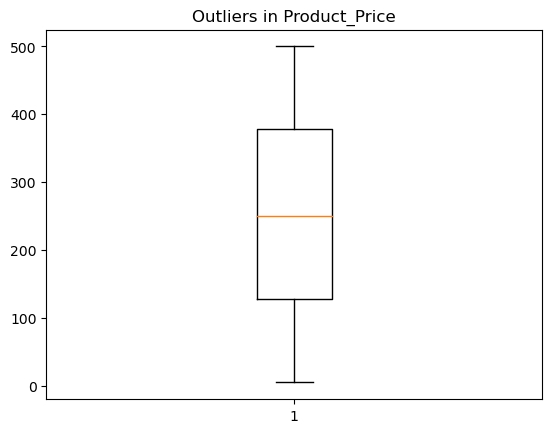

In [11]:
# Boxplot for Product_Price
plt.boxplot(df['Product_Price'])
plt.title("Outliers in Product_Price")
plt.show()

In [12]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [13]:
df['Total_Value'] = df['Product_Price'] * df['Order_Quantity']
df['Return_Duration'] = (df['Return_Date'] - df['Order_Date']).dt.days

In [14]:
#Exploratory Data Analysis (EDA)

# Numerical columns ke liye summary
print(df.describe())


       Product_Price  Order_Quantity  Days_to_Return      User_Age  \
count   10000.000000    10000.000000    10000.000000  10000.000000   
mean      252.369307        3.006100        1.229200     44.195000   
std       142.883865        1.406791      211.788533     15.311983   
min         5.010000        1.000000     -719.000000     18.000000   
25%       128.650000        2.000000       -2.250000     31.000000   
50%       250.445000        3.000000        1.000000     44.000000   
75%       377.837500        4.000000        6.000000     57.000000   
max       499.890000        5.000000      726.000000     70.000000   

       Discount_Applied   Total_Value  Return_Duration  
count      10000.000000  10000.000000      5052.000000  
mean          24.992162    762.618356         1.453682  
std           14.363396    598.316059       297.983208  
min            0.000000      5.270000      -719.000000  
25%           12.752500    281.320000      -214.000000  
50%           24.840000    

In [15]:
# Categorical columns ke liye unique values
print(df['Product_Category'].value_counts())
print(df['Return_Reason'].value_counts())
print(df['Return_Status'].value_counts())

Books          2041
Home           2030
Clothing       2000
Electronics    1985
Toys           1944
Name: Product_Category, dtype: int64
Defective           6275
Wrong item          1258
Changed mind        1255
Not as described    1212
Name: Return_Reason, dtype: int64
Returned        5052
Not Returned    4948
Name: Return_Status, dtype: int64


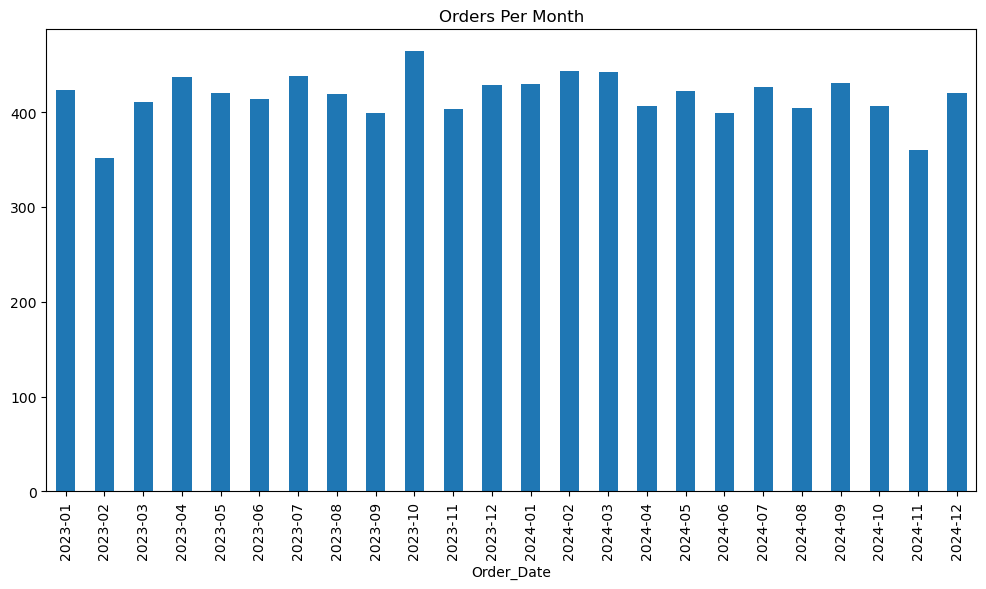

In [16]:
# Convert dates
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Return_Date'] = pd.to_datetime(df['Return_Date'])

# Orders over time
df.groupby(df['Order_Date'].dt.to_period('M')).size().plot(kind='bar', figsize=(12,6))
plt.title("Orders Per Month")
plt.show()

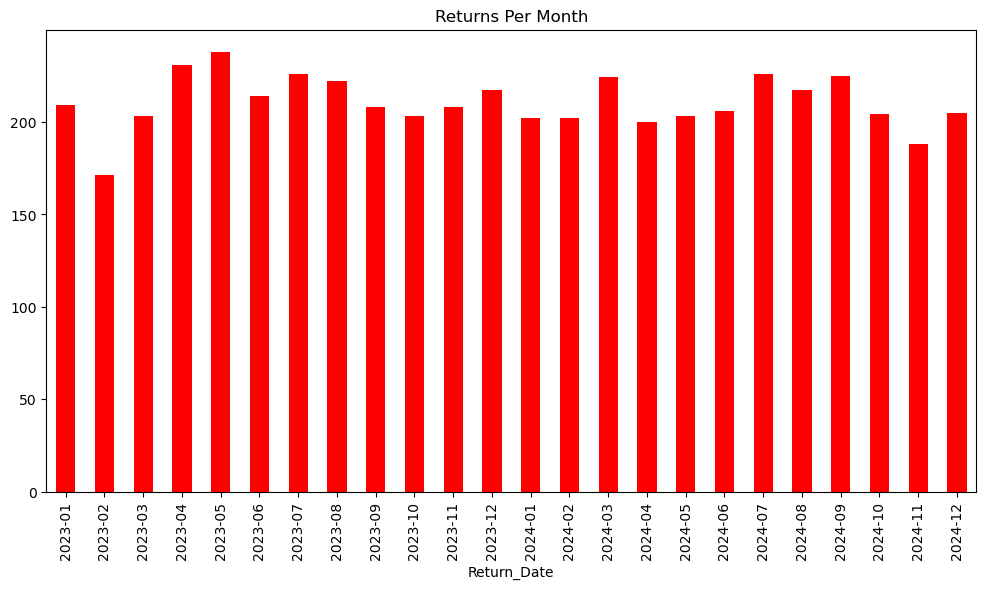

In [17]:
# Returns over time
df.groupby(df['Return_Date'].dt.to_period('M')).size().plot(kind='bar', figsize=(12,6), color='red')
plt.title("Returns Per Month")
plt.show()

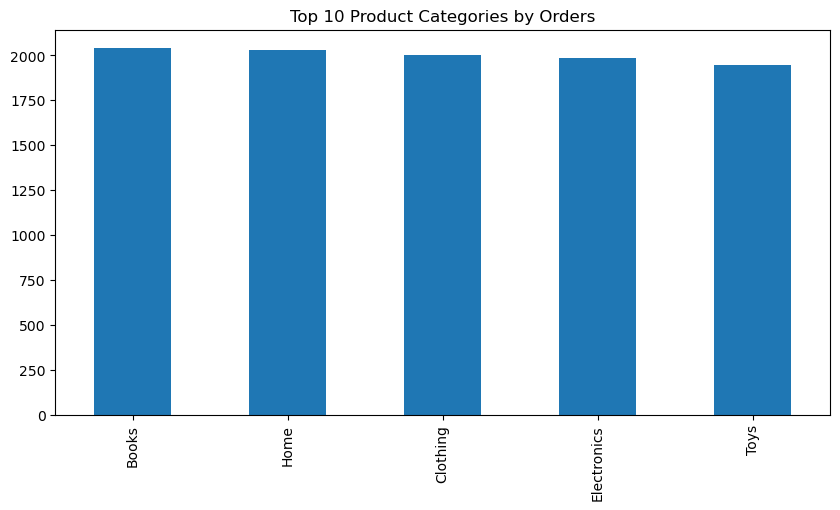

In [18]:
# Top 10 categories by orders
df['Product_Category'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Product Categories by Orders")
plt.show()

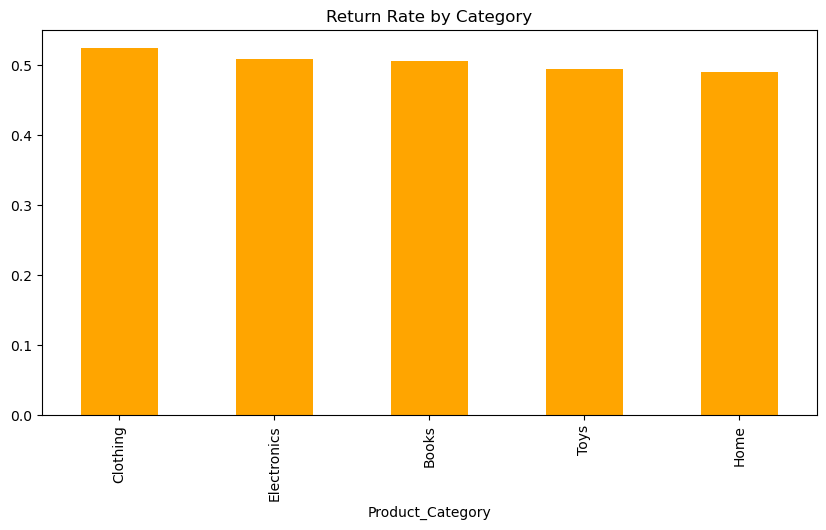

In [19]:
# Return rate by category
category_returns = df.groupby('Product_Category')['Return_Status'].apply(lambda x: (x=='Returned').mean())
category_returns.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Return Rate by Category")
plt.show()

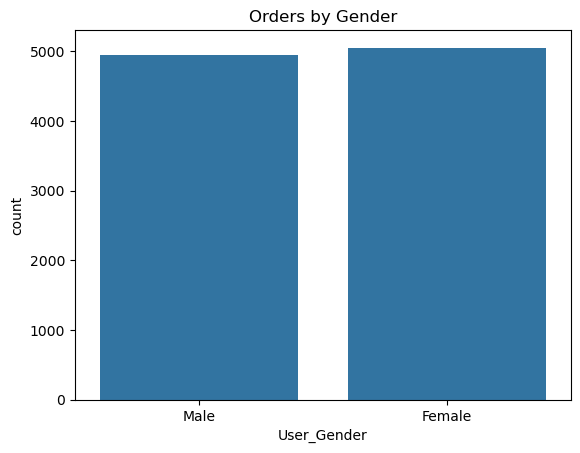

In [20]:
# Gender distribution
sns.countplot(x='User_Gender', data=df)
plt.title("Orders by Gender")
plt.show()

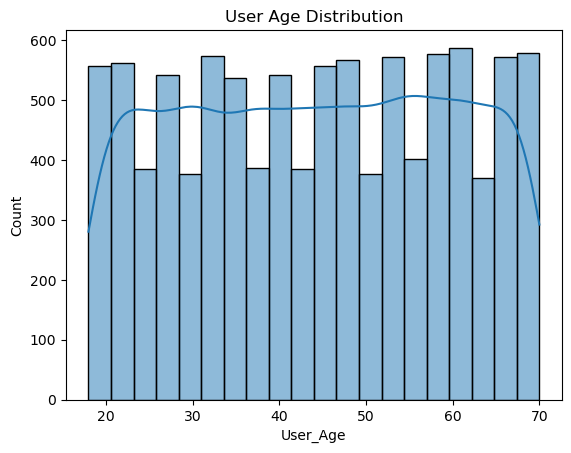

In [21]:
# Age distribution
sns.histplot(df['User_Age'], bins=20, kde=True)
plt.title("User Age Distribution")
plt.show()

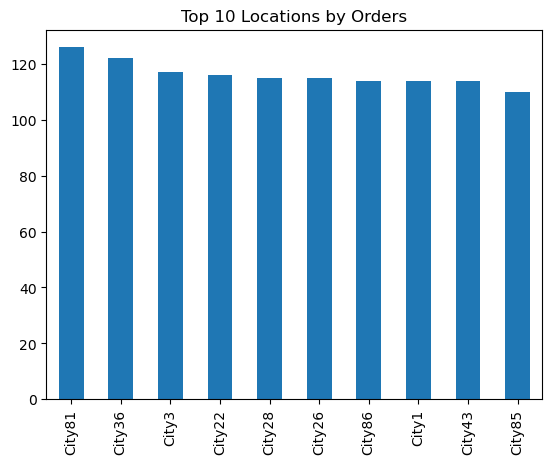

In [22]:
# Location wise orders
df['User_Location'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Locations by Orders")
plt.show()

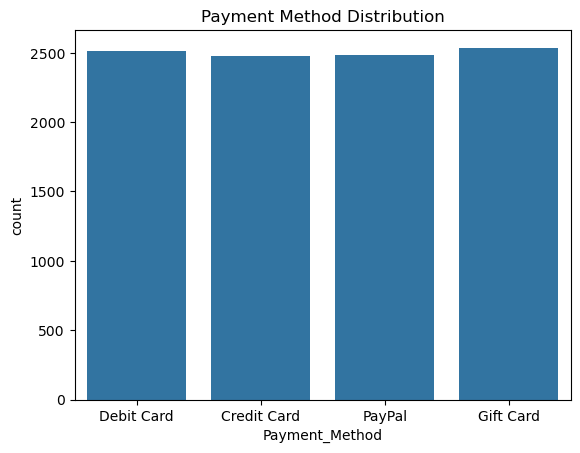

In [23]:
# Payment Method
sns.countplot(x='Payment_Method', data=df)
plt.title("Payment Method Distribution")
plt.show()

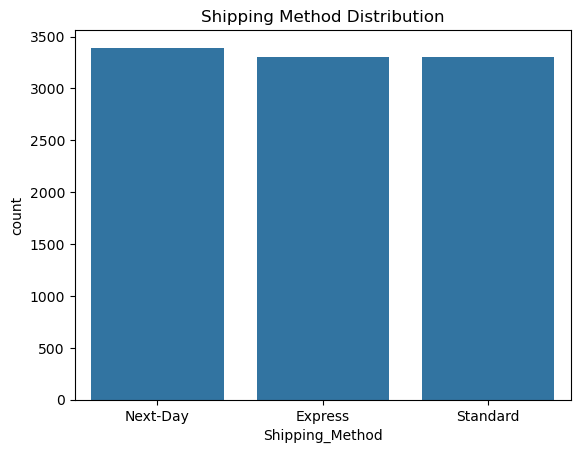

In [24]:
# Shipping Method
sns.countplot(x='Shipping_Method', data=df)
plt.title("Shipping Method Distribution")
plt.show()

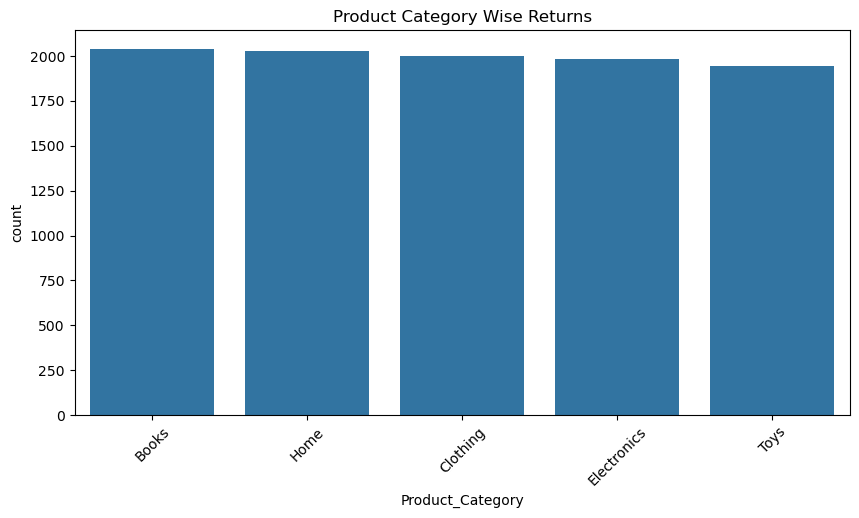

In [25]:
#Business Questions & Insights

#Category-wise Returns
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Product_Category", order=df["Product_Category"].value_counts().index)
plt.title("Product Category Wise Returns")
plt.xticks(rotation=45)
plt.show()

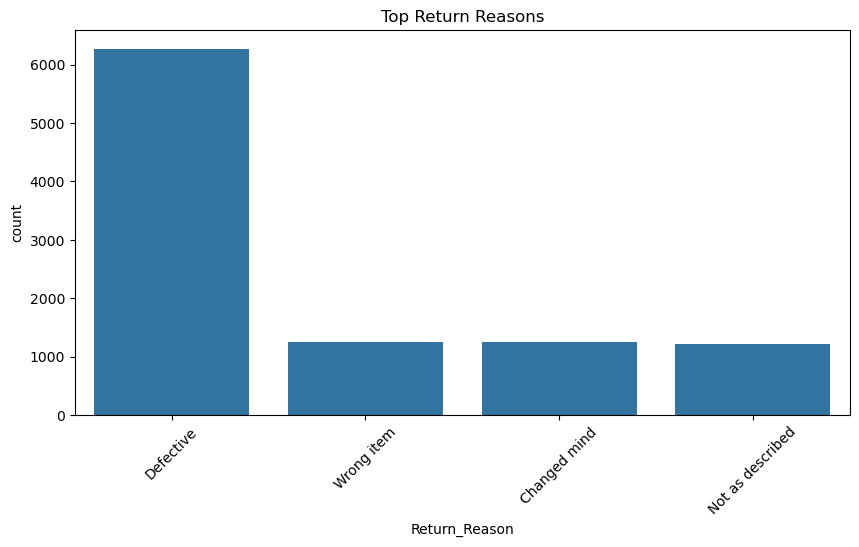

In [26]:
#Return Reasons Analysis

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Return_Reason", order=df["Return_Reason"].value_counts().index)
plt.title("Top Return Reasons")
plt.xticks(rotation=45)
plt.show()

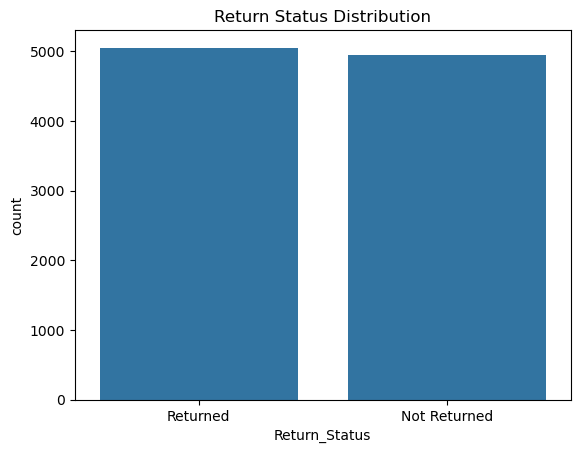

In [27]:
#Return Status (Approved / Denied / Pending etc.)

sns.countplot(data=df, x="Return_Status")
plt.title("Return Status Distribution")
plt.show()

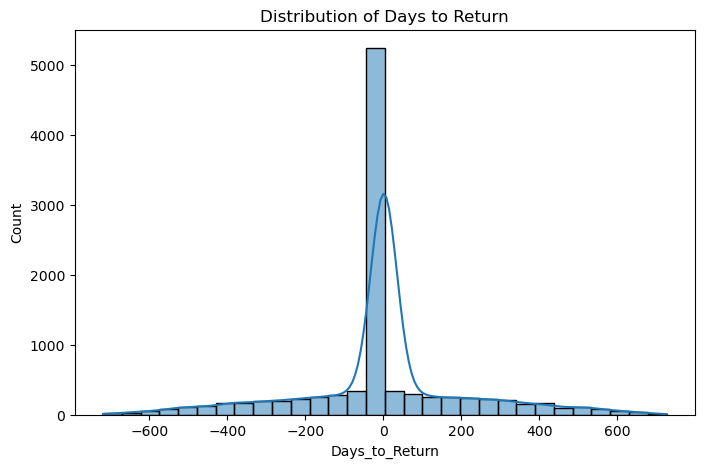

In [28]:
#Days to Return Analysis

plt.figure(figsize=(8,5))
sns.histplot(df["Days_to_Return"], bins=30, kde=True)
plt.title("Distribution of Days to Return")
plt.show()

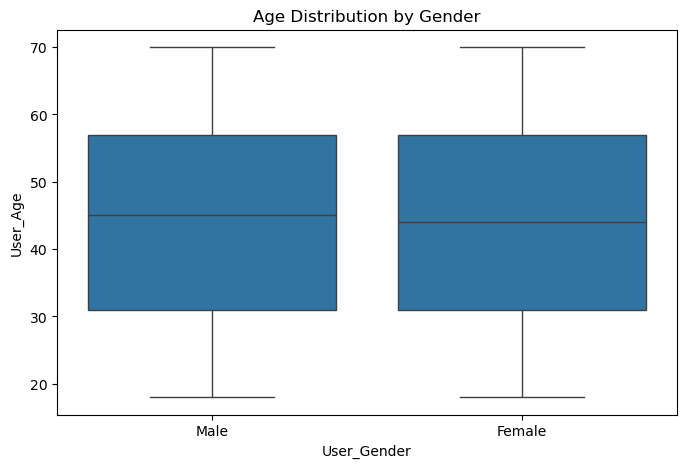

In [29]:
#User Demographics (Age & Gender vs Return Behavior)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="User_Gender", y="User_Age")
plt.title("Age Distribution by Gender")
plt.show()

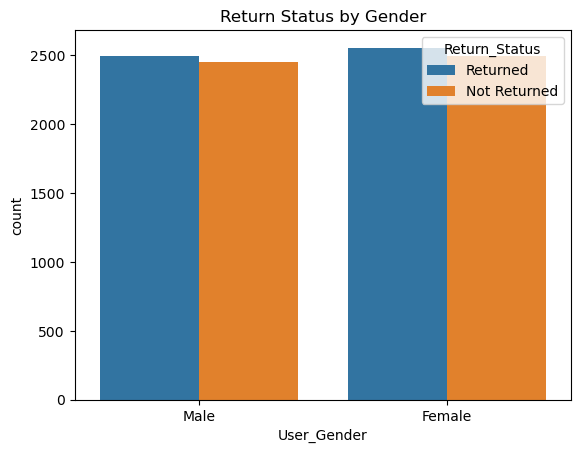

In [30]:
sns.countplot(data=df, x="User_Gender", hue="Return_Status")
plt.title("Return Status by Gender")
plt.show()

In [31]:
# Step 5: Feature Engineering
return_rate = df.groupby("Product_Category")["Return_Status"].apply(lambda x: (x=="Returned").mean()).reset_index()
print(return_rate)

  Product_Category  Return_Status
0            Books       0.506614
1         Clothing       0.524500
2      Electronics       0.509320
3             Home       0.490148
4             Toys       0.495370


<AxesSubplot:xlabel='Return_Status', ylabel='Discount_Applied'>

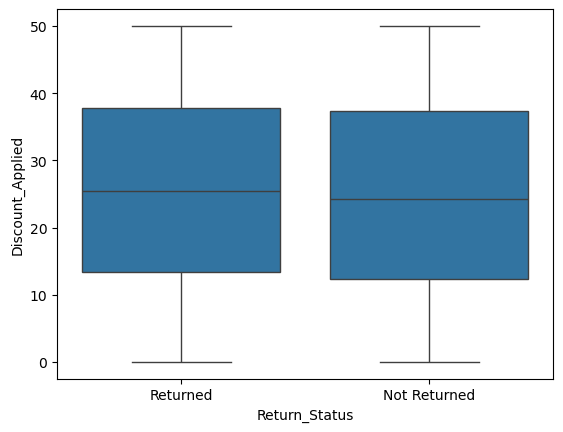

In [32]:
import seaborn as sns
sns.boxplot(x="Return_Status", y="Discount_Applied", data=df)

In [33]:
bins = [0,7,15,30,100]
labels = ["0-7","8-15","16-30","30+"]
df["Return_Bucket"] = pd.cut(df["Days_to_Return"], bins=bins, labels=labels)

In [34]:
user_returns = df.groupby("User_ID")["Return_Status"].apply(lambda x: (x=="Returned").mean()).reset_index()
user_returns.rename(columns={"Return_Status":"User_Return_Rate"}, inplace=True)
df = df.merge(user_returns, on="User_ID", how="left")

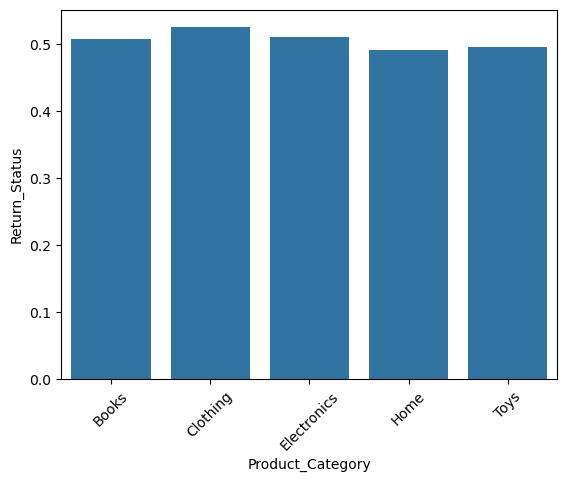

In [35]:
#Visualization for Insights
#Category-wise return rate bar plot

return_rate = df.groupby("Product_Category")["Return_Status"].apply(lambda x: (x=="Returned").mean()).reset_index()
sns.barplot(x="Product_Category", y="Return_Status", data=return_rate)
plt.xticks(rotation=45)
plt.show()


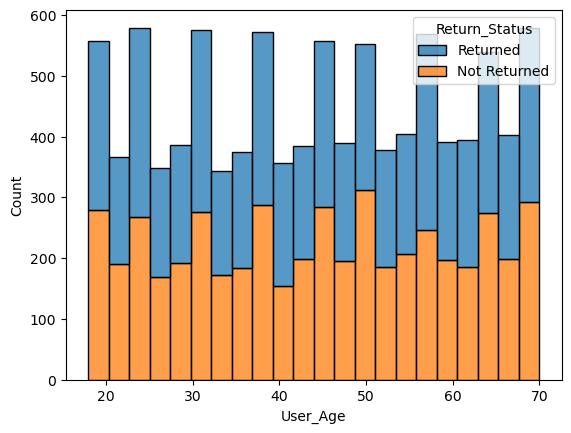

In [36]:
#Age vs Return behavior
sns.histplot(data=df, x="User_Age", hue="Return_Status", multiple="stack")
plt.show()

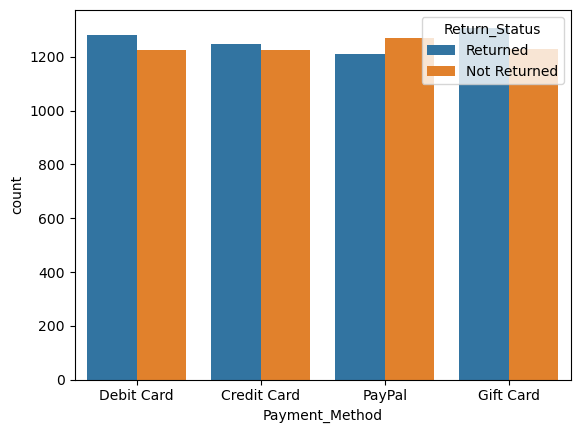

In [37]:
#Payment method vs Return rate
sns.countplot(x="Payment_Method", hue="Return_Status", data=df)
plt.show()

In [38]:
print(df['Return_Status'].value_counts(dropna=False))

Returned        5052
Not Returned    4948
Name: Return_Status, dtype: int64


In [39]:
# Clean (lowercase and strip extra spaces)
df['Return_Status'] = df['Return_Status'].str.strip().str.lower()

# Mapping 
df['Return_Status'] = df['Return_Status'].map({
    'returned': 1,
    'not returned': 0
})

# Verify
print(df['Return_Status'].value_counts())

1    5052
0    4948
Name: Return_Status, dtype: int64


In [40]:
category_return = df.groupby('Product_Category')['Return_Status'].mean().reset_index()
category_return['Return_%'] = category_return['Return_Status'] * 100
print(category_return)

  Product_Category  Return_Status   Return_%
0            Books       0.506614  50.661440
1         Clothing       0.524500  52.450000
2      Electronics       0.509320  50.931990
3             Home       0.490148  49.014778
4             Toys       0.495370  49.537037


C:\Users\Pooja Mahajan\AppData\Local\Temp\ipykernel_42076\3440359895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Return_%', data=category_return, palette="Set2")


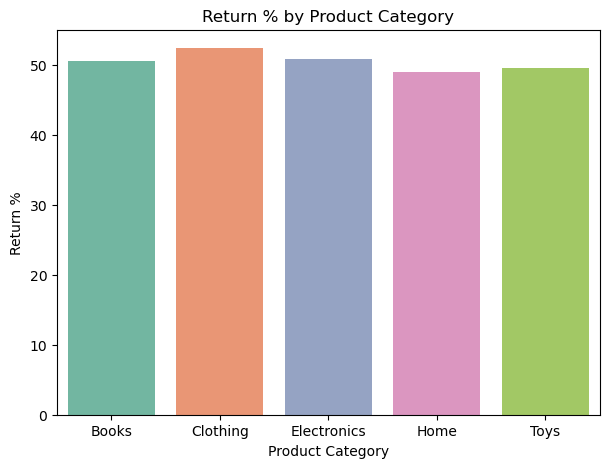

In [41]:
plt.figure(figsize=(7,5))
sns.barplot(x='Product_Category', y='Return_%', data=category_return, palette="Set2")
plt.title("Return % by Product Category")
plt.ylabel("Return %")
plt.xlabel("Product Category")
plt.show()

C:\Users\Pooja Mahajan\AppData\Local\Temp\ipykernel_42076\750819396.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='User_Location', y='Return_%', data=top_locations, palette="coolwarm")


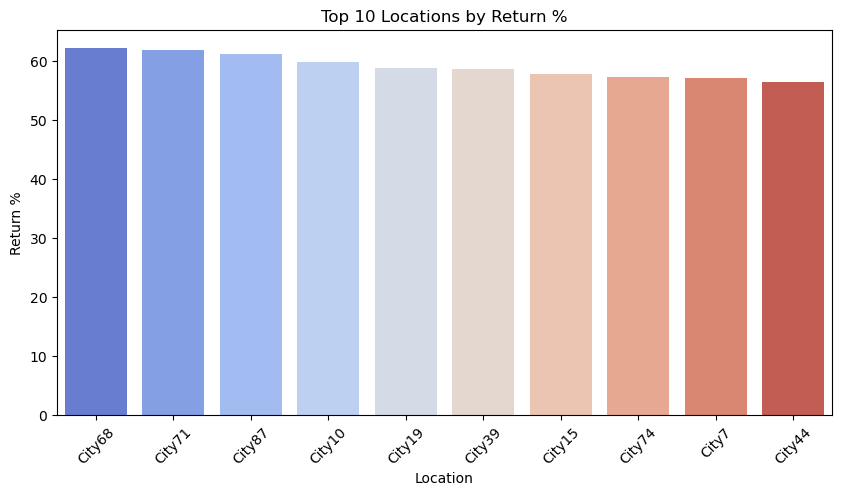

In [42]:
# 2. Location wise (Top 10)
location_return = df.groupby('User_Location')['Return_Status'].mean().reset_index()
location_return['Return_%'] = location_return['Return_Status'] * 100
top_locations = location_return.sort_values('Return_%', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='User_Location', y='Return_%', data=top_locations, palette="coolwarm")
plt.title("Top 10 Locations by Return %")
plt.ylabel("Return %")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()

C:\Users\Pooja Mahajan\AppData\Local\Temp\ipykernel_42076\163834144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment_Method', y='Return_%', data=payment_return, palette="viridis")


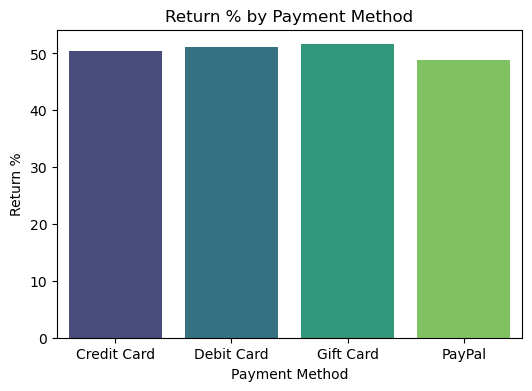

In [43]:
# 3. Payment Method wise
payment_return = df.groupby('Payment_Method')['Return_Status'].mean().reset_index()
payment_return['Return_%'] = payment_return['Return_Status'] * 100

plt.figure(figsize=(6,4))
sns.barplot(x='Payment_Method', y='Return_%', data=payment_return, palette="viridis")
plt.title("Return % by Payment Method")
plt.ylabel("Return %")
plt.xlabel("Payment Method")
plt.show()

C:\Users\Pooja Mahajan\AppData\Local\Temp\ipykernel_42076\2166811044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipping_Method', y='Return_%', data=shipping_return, palette="magma")


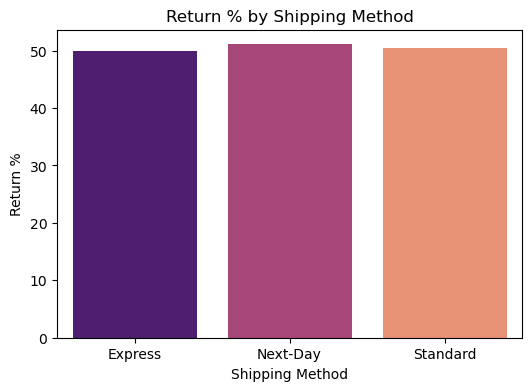

In [44]:
# 4. Shipping Method wise
shipping_return = df.groupby('Shipping_Method')['Return_Status'].mean().reset_index()
shipping_return['Return_%'] = shipping_return['Return_Status'] * 100

plt.figure(figsize=(6,4))
sns.barplot(x='Shipping_Method', y='Return_%', data=shipping_return, palette="magma")
plt.title("Return % by Shipping Method")
plt.ylabel("Return %")
plt.xlabel("Shipping Method")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Features & Target
X = df[['Product_Category','Product_Price','Order_Quantity','User_Age',
        'Days_to_Return','Discount_Applied','User_Gender',
        'User_Location','Payment_Method','Shipping_Method']]
y = df['Return_Status']

# Categorical and numerical columns
cat_features = ['Product_Category','User_Gender','User_Location','Payment_Method','Shipping_Method']
num_features = ['Product_Price','Order_Quantity','User_Age','Days_to_Return','Discount_Applied']

# Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # fill NaN with median
    ('scaler', StandardScaler())                     # scaling
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # fill NaN with most frequent category
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Final pipeline with logistic regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.49      1009
           1       0.50      0.53      0.51       991

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

Confusion Matrix:
 [[471 538]
 [462 529]]


In [46]:
category_return.to_csv("high_risk_categories.csv", index=False)